In [1]:
from utils.dataset_folder_chloe import rasterio_loader
t = rasterio_loader("/scratch/bepk/bkim2/patches/MODIS/patch_1008_1008/2018-07-22_IA.tif")
print("shape :", t.shape)            # (C,H,W) 여야 안전
print("min/max :", t.min(), t.max()) # 값 범위 0‑10000? 0‑1?


shape : torch.Size([7, 224, 224])
min/max : tensor(157.) tensor(6022.)


In [5]:
# check.py
import argparse
import rasterio

def parse_args():
    p = argparse.ArgumentParser()
    p.add_argument('--modis_txt', type=str, default='/scratch/bepk/bkim2/MultiMAE/valid_list/valid_MODIS.txt')
    p.add_argument('--s2_txt', type=str, default='/scratch/bepk/bkim2/MultiMAE/valid_list/valid_S2.txt')
    return p.parse_args()

def check(txt):
    bad = []
    with open(txt) as f:
        for line in f:
            path = line.strip()
            try:
                with rasterio.open(path) as src:
                    _ = src.read(1, out_dtype='float32')
            except Exception as e:
                bad.append((path, repr(e)))
    return bad

if __name__ == "__main__":
    args = parse_args()
    bad_modis = check(args.modis_txt)
    bad_s2 = check(args.s2_txt)

    print(f"# bad MODIS: {len(bad_modis)}")
    for p, e in bad_modis[:20]:
        print(p, e)
    print(f"# bad S2: {len(bad_s2)}")
    for p, e in bad_s2[:20]:
        print(p, e)


usage: ipykernel_launcher.py [-h] [--modis_txt MODIS_TXT] [--s2_txt S2_TXT]
ipykernel_launcher.py: error: unrecognized arguments: --f=/u/bkim2/.local/share/jupyter/runtime/kernel-v31c4cb9ed6bd684338f5cb122ebafa2a9799d567f.json


SystemExit: 2

### inference

In [9]:
import numpy as np
import matplotlib.pyplot as plt

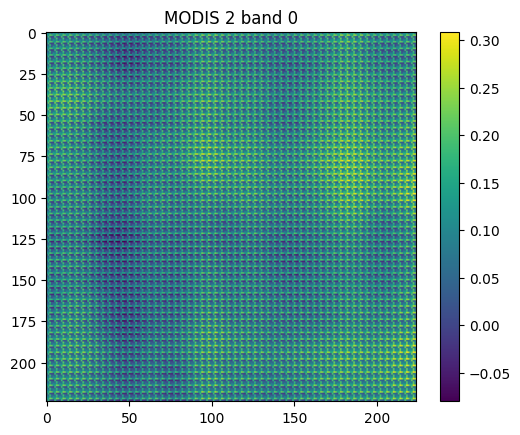

In [ ]:
pred = np.load('./inference_result/pred_30m_s2_batch0.npy')  # (12,H,W)

band = 0                   # 예) 4번째 밴드
plt.imshow(pred[band], cmap='viridis')  # 정규화 안 했으면 cmap 지정
plt.title(f'MODIS 2 band {band}')
plt.colorbar()
plt.show()

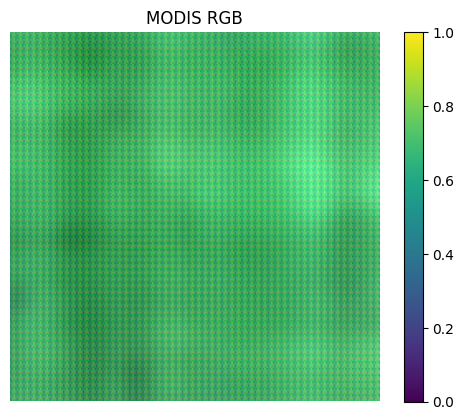

In [16]:
rgb = np.stack([pred[0], pred[3], pred[2]], axis=-1)   # 예: 4‑3‑2
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())      # 0‑1 정규화
plt.title(f'MODIS RGB')
plt.imshow(rgb); plt.axis('off')
plt.colorbar()
plt.show()

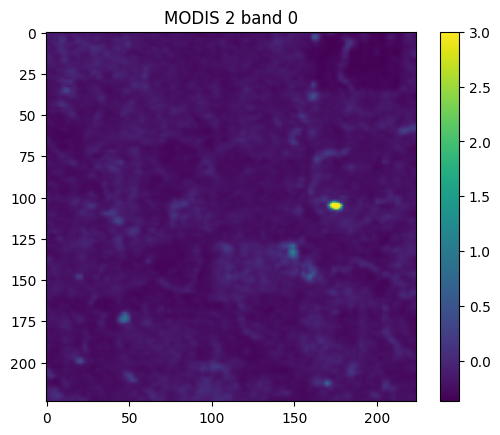

In [6]:
pred = np.load('./inference_result/gt_30m_s1_000000.npy')  # (12,H,W)

band = 0                     # 예) 4번째 밴드
plt.imshow(pred[band], cmap='viridis')  # 정규화 안 했으면 cmap 지정
plt.title(f'MODIS 2 band {band}')
plt.colorbar()
plt.show()


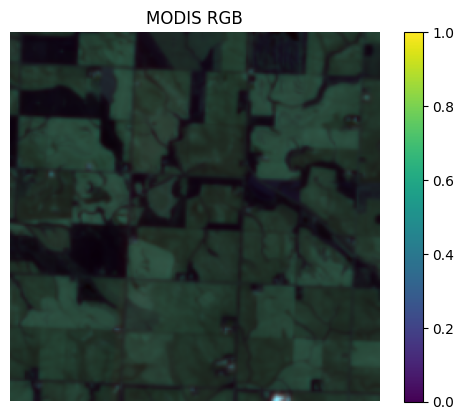

In [15]:
rgb = np.stack([pred[0], pred[3], pred[2]], axis=-1)   # 예: 4‑3‑2
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())      # 0‑1 정규화
plt.title(f'MODIS RGB')
plt.imshow(rgb); plt.axis('off')
plt.colorbar()
plt.show()


In [ ]:
tif_path = './inference_result/gt_modis_new.tif'  # tif 경로
band = 6  # 0부터 시작하는 인덱스, 6번째 밴드면 7번째 채널

with rasterio.open(tif_path) as src:
    # tif 파일은 1부터 밴드 인덱스 시작하므로 +1 해줘야 함
    img = src.read(band + 1)

plt.imshow(img, cmap='viridis')  # 필요시 cmap 조정
plt.title(f'MODIS band {band}')
plt.colorbar()
plt.show()
